In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/coin-wear-estimator/notebook')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%load_ext autoreload
%autoreload 2

import sys
if ".." not in sys.path:
  sys.path.append("..")
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from shutil import copyfile
import shutil
from src.utils import NIEMCZYK_DATASET_PATH, MARCINIAK_DATASET_PATH, raw_coins_path, side_path

In [10]:
# DS_PATH = NIEMCZYK_DATASET_PATH
DS_PATH = MARCINIAK_DATASET_PATH

# Manual labeling

In [6]:
def create_labels(dir_path = raw_coins_path(DS_PATH), csv_path = side_path(DS_PATH)):
    labels = []
    dir_path = dir_path + '/'
    img_list = sorted([im_name for im_name in os.listdir(dir_path) if im_name.endswith(".jpg")])
    
    try:
        df = pd.read_csv(csv_path)
    except:
        df = pd.DataFrame({"name": img_list, "label": None})

    for i, row in df.iterrows():
        if pd.isna(row["label"]):
            im = Image.open(dir_path + row["name"])
            plt.figure(figsize=(10,10))
            plt.imshow(im)
            plt.axis('off') 
            plt.title(row["name"])
            plt.show()
            inp = input()
            if inp == "":
                inp = -1
            df["label"][i] = inp
            df.to_csv(csv_path, index=None)
            clear_output(wait=True)

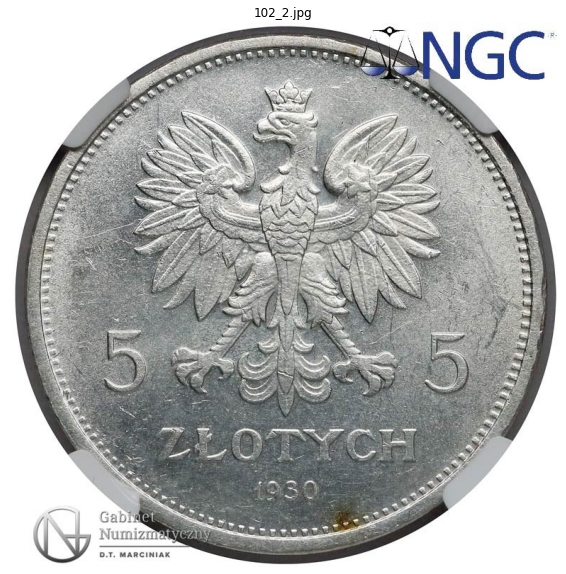

In [ ]:
create_labels()

## Checking

For every label directory is created - manual checking in those directories should be performed.

In [ ]:
df = pd.read_csv(side_path(DS_PATH))

raw_dir = raw_coins_path(DS_PATH)
for label in set(df["label"]):
    names = list(df[df["label"] == label]["name"])
    label_dir = raw_dir + "/%d" % (label)
    if os.path.exists(label_dir):
        shutil.rmtree(label_dir)
    os.makedirs(label_dir)

    for name in names:
        copyfile("{}/{}".format(raw_dir, name), "{}/{}".format(label_dir, name))

In [20]:
side_df = pd.read_csv(side_path(DS_PATH))
side_df = side_df[side_df["label"] > 0.2]
side_df["name"] = side_df["name"].apply(lambda x: int(x.split("_")[0]))
image_counts = side_df.groupby(['name']).agg(['count'])
image_counts.columns = ["count"]
image_counts = image_counts.sort_index()
image_counts[image_counts["count"] != 2]

,count
name,
